<a href="https://colab.research.google.com/github/JoannaLe/cancer-detection/blob/master/ashley_model_training_cancer_verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from keras.applications.resnet50 import ResNet50
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.models import Sequential, Model

import numpy as np
import os
import matplotlib.pyplot as plt

GOOGLE_APPLICATION_CREDENTIALS = '/content/cancer-detection-fa915e095a9d.json'


# Open Google Cloud Drive
from google.colab import drive
drive.mount('/content/gdrive')


print(os.getcwd())
os.chdir("/content")
!ls

# get X training data
x_path = "gdrive/My Drive/cancer-detection/patch-zoom-6"
print(x_path)
files = os.listdir(x_path)
number_files = len(files)
print(number_files)
X_train = []

for patch_file in os.listdir(x_path):
  patch_path = os.path.join(x_path, patch_file)
  patch_arr = np.load(patch_path)
  X_train.append(patch_arr)
  
print(type(X_train[0]))
print(len(X_train))
X_train = np.array(X_train)

# get Y training data
y_path = "gdrive/My Drive/cancer-detection/mask-zoom-6"
print(os.listdir(y_path))
y_train = []

for mask_file in os.listdir(y_path):
  mask_path = os.path.join(y_path, mask_file)
  mask = open(mask_path, 'r').read()
  y_train.append(int(mask))
  
print(type(y_train[0]))
print(y_train)
print(len(y_train))
y_train = np.array(y_train)

# test 1 model at zoom level 6
img_shape = (224,224,3)
EPOCHS = 5
BATCH_SIZE = 32
NUM_OF_RESULTS = 2

# model = ResNet50(include_top=True, weights='imagenet', input_shape=img_shape)
# # x = Flatten()(base.output)
# # x = Dense(NUM_OF_RESULTS, activation='sigmoid', return_sequences = False)(x)
# # model = Model(inputs=base.inputs, outputs=x) # creating 2 class ResNet50 

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# model.summary()


# model1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

img_shape = (224,224,3)
EPOCHS = 10
BATCH_SIZE = 32

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=img_shape))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


print(X_train.shape)

model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content
gdrive	sample_data
gdrive/My Drive/cancer-detection/patch-zoom-6
506
<class 'numpy.ndarray'>
506
['005-mask-0', '005-mask-1', '005-mask-2', '005-mask-3', '005-mask-4', '005-mask-6', '005-mask-5', '005-mask-7', '005-mask-8', '005-mask-9', '005-mask-11', '005-mask-10', '005-mask-12', '005-mask-13', '005-mask-14', '005-mask-15', '005-mask-16', '005-mask-17', '005-mask-18', '005-mask-19', '005-mask-20', '005-mask-21', '005-mask-22', '005-mask-23', '005-mask-24', '005-mask-25', '005-mask-27', '005-mask-26', '005-mask-28', '005-mask-29', '005-mask-30', '005-mask-31', '005-mask-32', '005-mask-33', '005-mask-34', '005-mask-35', '005-mask-36', '005-mask-37', '005-mask-38', '005-mask-39', '005-mask-40', '005-mask-42', '005-mask-41', '005-mask-43', '005-mask-44', '005-mask-45', '005-mask-46', '005-mask-47', '005-mask-48', '005-mask-49', '005-mask-50', '005-ma

In [9]:
for cell in y_train:
  if cell == 1:
    print("yes")

yes
yes


gdrive/My Drive/cancer-detection/patch-val/016
434
<class 'numpy.ndarray'>
434
434


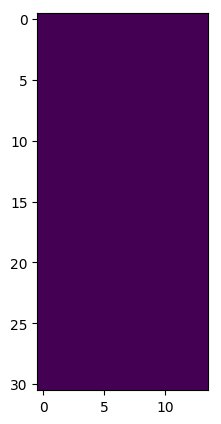

In [4]:
# Validation step 
# Generate patches from image 016
val_path = "gdrive/My Drive/cancer-detection/patch-val/016"


# get X validation data
print(val_path)
files = os.listdir(val_path)
number_files = len(files)
print(number_files)
X_val = []

for patch_file in os.listdir(val_path):
  patch_path = os.path.join(val_path, patch_file)
  patch_arr = np.load(patch_path)
  X_val.append(patch_arr)
  
print(type(X_val[0]))
print(len(X_val))
X_val = np.array(X_val)



In [0]:
# pred = model.predict(x=X_val, batch_size = 32)
# print(len(pred))

# num_patch_x = 13 # download from file 
# num_patch_y = 30
# patch_dim = 224

# pred = model.predict(x=X_val, batch_size = 32)

# matrix = np.zeros((num_patch_y + 1, num_patch_x + 1), dtype=int)

# count = 0
for i in pred: 
  if i is 1:
    print("cancer")
#   matrix[count//(num_patch_x+1)][count%(num_patch_x+1)] = i # impt

# plt.figure(figsize=(5,5), dpi=100)
# plt.imshow(matrix)

In [0]:
# creating model for zoom 5

# get X training data
x_path = "gdrive/My Drive/cancer-detection/patch-zoom-5"
print(x_path)
files = os.listdir(x_path)
number_files = len(files)
print(number_files)
X_train = []

for patch_file in os.listdir(x_path):
  patch_path = os.path.join(x_path, patch_file)
  patch_arr = np.load(patch_path)
  X_train.append(patch_arr)
  
print(type(X_train[0]))
print(len(X_train))
X_train = np.array(X_train)

# get Y training data
y_path = "gdrive/My Drive/cancer-detection/mask-zoom-5"
print(os.listdir(y_path))
y_train = []

for mask_file in os.listdir(y_path):
  mask_path = os.path.join(y_path, mask_file)
  mask = open(mask_path, 'r').read()
  y_train.append(int(mask))
  
print(type(y_train[0]))
print(y_train)
print(len(y_train))
y_train = np.array(y_train)

# test 1 model at zoom level 6
img_shape = (224,224,3)
EPOCHS = 5
BATCH_SIZE = 32
NUM_OF_RESULTS = 2

# model = ResNet50(include_top=True, weights='imagenet', input_shape=img_shape)
# # x = Flatten()(base.output)
# # x = Dense(NUM_OF_RESULTS, activation='sigmoid', return_sequences = False)(x)
# # model = Model(inputs=base.inputs, outputs=x) # creating 2 class ResNet50 

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])
# model.summary()


# model1.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

img_shape = (224,224,3)
EPOCHS = 10
BATCH_SIZE = 32

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=img_shape))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()


print(X_train.shape)

model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE)

In [0]:
# testing with a different model 

# test 1 model at zoom level 6
img_shape = (224,224,3)
EPOCHS = 5
BATCH_SIZE = 32
NUM_OF_RESULTS = 2

model = ResNet50(include_top=True, weights='imagenet', input_shape=img_shape)
# x = Flatten()(base.output)
# x = Dense(NUM_OF_RESULTS, activation='sigmoid', return_sequences = False)(x)
# model = Model(inputs=base.inputs, outputs=x) # creating 2 class ResNet50 

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()